In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [3]:
df=pd.read_csv('spam.csv',encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df=df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
x=df['v2'].values
y=df['v1'].values

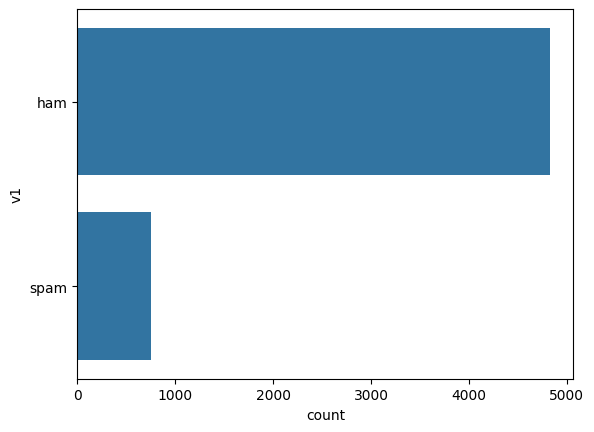

In [6]:
sns.countplot(df['v1'])
plt.show()

In [7]:
df['v1'].value_counts(normalize=True)

v1
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

In [8]:
df.isna().sum()

v1    0
v2    0
dtype: int64

In [9]:
df['v2'][1]

'Ok lar... Joking wif u oni...'

In [11]:
df['v2'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [12]:
df['v2'][1000]

'No..but heard abt tat..'

In [16]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Venu Gopala
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop_words = stopwords.words('english')


In [18]:
snow=SnowballStemmer('english')

In [22]:
text = []
for message in df['v2']:
    message = message.lower().strip()
    cleaner = re.compile('<.*?>')
    message = re.sub(r"[^a-zA-Z0-9]", " ", message)
    message = re.sub(r'\d+', '', message)
    message = [snow.stem(word) for word in message.split() if word not in stop_words]
    text.append(' '.join(message))

In [21]:
import re

In [23]:
text[100]

'okay name ur price long legal wen pick u ave x am xx'

In [24]:
count_vect=CountVectorizer(max_features=5000)
bow_data=count_vect.fit_transform(text).toarray()
print(bow_data[1])

[0 0 0 ... 0 0 0]


In [27]:
feature_names = count_vect.get_feature_names_out()

In [28]:
print(feature_names[:10])

['aah' 'aathi' 'aberdeen' 'abi' 'abil' 'abiola' 'abj' 'abl' 'abnorm'
 'abouta']


In [32]:
tf_idf = TfidfVectorizer()
tf_data = tf_idf.fit_transform(text).toarray()
print(tf_data.shape)

(5572, 6275)


In [34]:
feature_names = tf_idf.get_feature_names_out()

In [35]:
print(feature_names[:10])

['aa' 'aah' 'aaniy' 'aaooooright' 'aathi' 'ab' 'abbey' 'abdomen' 'abeg'
 'abel']


In [37]:
x_train,x_test,y_train,y_test=train_test_split(bow_data,y)

In [38]:
x_train.shape

(4179, 5000)

In [39]:
y_train.shape

(4179,)

In [41]:
lr_bow = LogisticRegression(class_weight='balanced')
lr_bow.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
y_pred = lr_bow.predict(x_test)

# Calculate and print the accuracy
print('acc:', accuracy_score(y_test, y_pred))

acc: 0.9798994974874372


In [46]:
print('train-acc:',accuracy_score(y_train,lr_bow.predict(x_train)))

train-acc: 0.9973677913376405


In [49]:
from sklearn.metrics import confusion_matrix

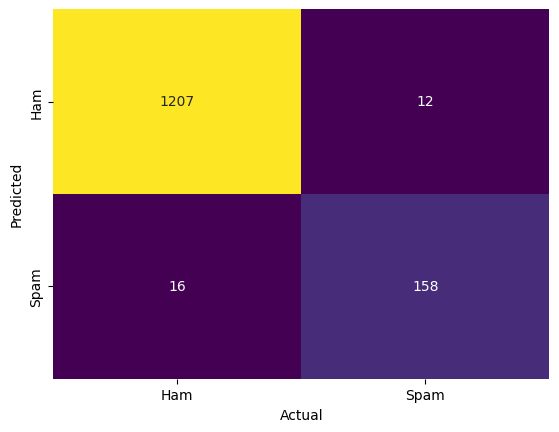

In [50]:
cm=confusion_matrix(y_test,y_pred)
c_df=pd.DataFrame(data=cm,columns=['Ham','Spam'],index=['Ham','Spam'])
sns.heatmap(c_df,annot=True,cbar=False,fmt='d',cmap='viridis')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [69]:
msg = 'hello how are you I am fine'.lower()


In [70]:
b = count_vect.transform([msg]).toarray()


In [73]:
b.shape

(1, 5000)

In [71]:
prediction = lr_bow.predict(b)[0]
print(prediction)

ham
